In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.3
/home/phys/villaa/analysis/misc/nrFano_paper2019/mplstyles


In [2]:
import prob_dist as prob
import imp
imp.reload(prob)

print(np.sqrt(prob.series_NRQ_var_corr(Er=38.5,F=0.0,V=4.0,aH=0.0381,alpha=(1/18.0),A=0.16,B=0.18,label='GGA3', \
                               corr1file='data/sigdiff_test1.h5')))

[[0.03397677]]


In [3]:
import h5py

f = h5py.File('data/sigdiff_test1.h5','r')
E = np.zeros((0,))
for i in f['NR/']:
  a = np.asarray([float(i)])
  E = np.concatenate((E,a))

f.close()
E = np.sort(E)

sig_corr = lambda Er: np.sqrt(prob.series_NRQ_var_corr(Er=Er,F=0.0,V=4.0,aH=0.0381, \
                alpha=(1/18.0),A=0.16,B=0.18,label='GGA3',corr1file='data/sigdiff_test1.h5'))

sig_corrv = np.vectorize(sig_corr)
print(sig_corrv(E))

[0.11802666 0.09935824 0.0864587  0.06262166 0.05314698 0.04983596
 0.04947574 0.04631905 0.04357745 0.0411757  0.03717223 0.03548893
 0.03397677 0.03261206 0.03137531 0.03025032 0.02922354 0.02828351
 0.02662616 0.02589334 0.02521582 0.02458819 0.02400572 0.02346427
 0.02249012 0.0220513  0.02164111 0.02125723 0.02056035 0.0202438
 0.01994642 0.01966681 0.01940373 0.01915602 0.01892264 0.01870261
 0.01849507 0.01829919 0.01811424 0.01793952 0.0177744  0.0176183
 0.01747066 0.01733099 0.0171988  0.0170737  0.01695524 0.01684306
 0.01673681 0.01663616 0.0165408  0.01645045 0.01636483 0.0162837
 0.01620682 0.01613396 0.01599952 0.01593755 0.01587885 0.01582326
 0.01577061 0.01572078 0.01567361 0.01562898 0.01558678 0.01554686
 0.01550917 0.01547355 0.01543992 0.01540821 0.01537831 0.01535014
 0.01532363 0.01529868 0.01527526 0.01525327 0.01523265 0.01521336
 0.01519532 0.01517848 0.01516281 0.01514822 0.0151347  0.01512217
 0.01511062 0.01509999 0.01509025 0.01508136 0.01506598 0.0150594

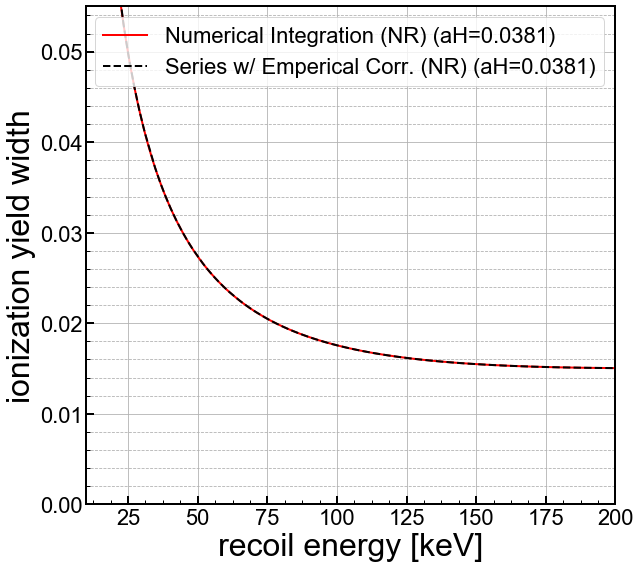

In [4]:
import fano_calc as fc

#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


#ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
#         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
ax1.plot(Enr,signr,color='r',linestyle="-",linewidth=2, \
         label='Numerical Integration (NR) (aH={})'.format(0.0381))
ax1.plot(E,sig_corrv(E),color='k',linestyle="--",linewidth=2, \
         label='Series w/ Emperical Corr. (NR) (aH={})'.format(0.0381))
#ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
#         label='Series Approximation (NR) (aH={})'.format(0.0381))
#ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,V=4.0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='b',linestyle="-",linewidth=2, \
#         label='Analytical Integral (ER) (aH={})'.format(0.0381))



ymin = 0.0
ymax = 0.055



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

In [5]:

corr_A = lambda A: prob.series_NRQ_var_c2(Er=10.0,F=0.0,V=4.0,aH=0.0381,alpha=(1/18.0),A=A, \
                                        B=0.18,label='GGA3',corr1file='data/sigdiff_test1.h5')

print(corr_A(0.16))

[[3.03662495e-08]]
